<a href="https://colab.research.google.com/github/thekishanpatel/FastAi/blob/master/FastAi_Lesson2_Linear_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

# **Stochastic Gradient Descent (SGD)**
**SGD**: An iterative method for optimizing objective functions, which is commonly used in Neural Networks

In [2]:
n = 100;
x = torch.ones(n,2);
x[:,0].uniform_(-1.,1) # In-place transforming of all-rows-first-column values to a values between -1 and 1 that are uniformly distributed. (And function-name ending with an '_' does in-place substitutions)
x[:5]

tensor([[ 0.4148,  1.0000],
        [ 0.7744,  1.0000],
        [-0.3153,  1.0000],
        [ 0.8555,  1.0000],
        [ 0.8310,  1.0000]])

In [41]:
a_initial = tensor(3., 2); # The slope and y-intercept
a_initial

tensor([3., 2.])

# **Model (Linear Regression)**


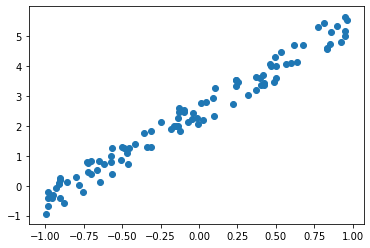

In [42]:
y = x@a_initial + torch.rand(n)
plt.scatter(x[:,0], y)

# **Loss Function (Root Mean Squared Error)**

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() # You want to find parameters that minimizes this error-function

In [0]:
a = tensor(-1., 1.) # Our initial prediction

In [7]:
y_hat = x@a
mse(y_hat, y)

tensor(7.0707)

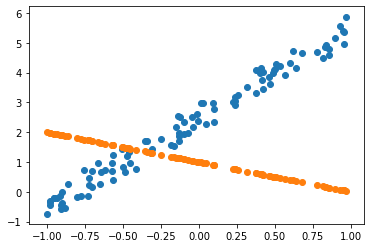

In [8]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

# **Gradient Descent**
Gradient Descent: an algorithm that minimizes functions. 

In [9]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t % 10 == 0: print(loss)
  loss.backward() # The derivative
  with torch.no_grad():
    a.sub_(lr*a.grad) # Updates the 'a' variable
    a.grad.zero_() # Resets the gradient to 0

In [34]:
lr = 1e-1
for t in range(100): update()

tensor(70.0326, grad_fn=<MeanBackward0>)
tensor(0.8388, grad_fn=<MeanBackward0>)
tensor(0.0832, grad_fn=<MeanBackward0>)
tensor(0.0749, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)


Optimized parameters are tensor([2.9855, 2.4792])
Original parameters were tensor([3., 2.])


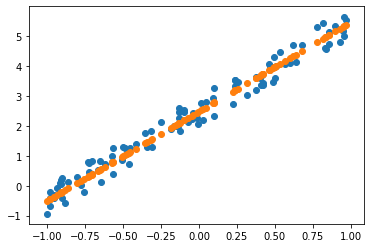

In [44]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a.data) # **NOTE:** a.data, becuase 'a' was turned into a parameter before the optimizer
print("Optimized parameters are {}".format(a.data))
print("Original parameters were {}".format(a_initial))

# **Animating the Gradient Descent Optimization**


In [36]:
from matplotlib import animation, rc
rc('animation', html='jshtml')
a = nn.Parameter(tensor(-1., 1.))
fig = plt.figure()
plt.scatter(x[:,0], y, c = 'orange')
line, = plt.plot(x[:,0], x@a.data)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.data)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval = 20)